<h2 align="center">  Linear Regression </h2>

### Load the Data and Libraries
---

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
data = pd.read_csv("food_truck_data.txt")
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data
---

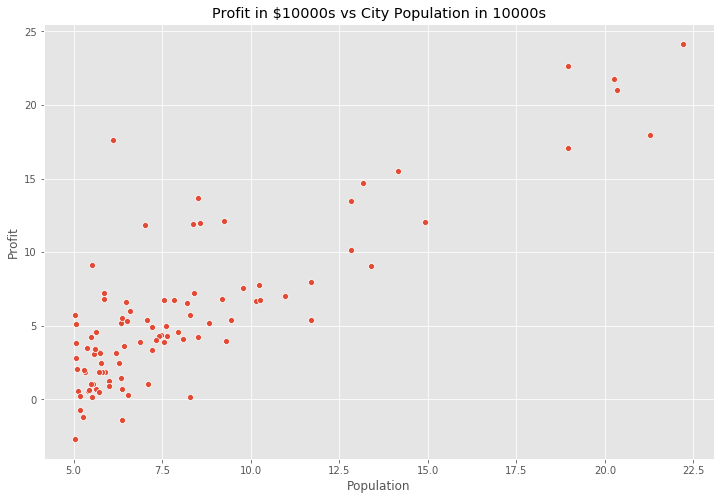

In [5]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

###  Cost Function $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$



In [6]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [8]:
m = data.Population.values.size
# add another dimension to accomodate the intercept term and set it to all ones
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
gamma = np.zeros((2,1))

cost_function(X, y, gamma)

32.072733877455676

### Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until it reaches convergence
        


In [14]:
def gradient_descent(X, y, gamma, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(gamma)
        error = np.dot(X.transpose(), (y_pred - y))
        gamma -= alpha * 1/m * error
        costs.append(cost_function(X, y, gamma))
        
    return gamma, costs

In [15]:
gamma, costs = gradient_descent(X, y, gamma, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(gamma[0, 0], 2)),
                                str(round(gamma[1, 0], 2))))

h(x) = -3.24 + 1.13x1


In [16]:
costs[999]

4.515815084502823

### Visualising the Cost Function $J(\theta)$
---

In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [18]:
gamma_0 = np.linspace(-10,10,100)
gamma_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(gamma_0), len(gamma_1)))

for i in range(len(gamma_0)):
    for j in range(len(gamma_1)):
        t = np.array([gamma_0[i], gamma_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

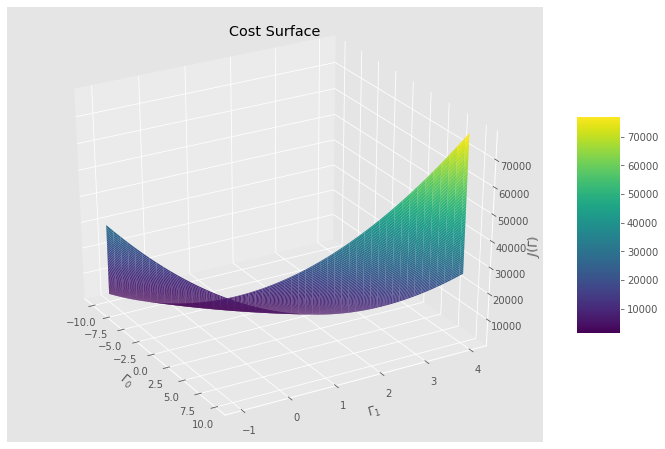

In [20]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(gamma_0,gamma_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Gamma_0$")
plt.ylabel("$\Gamma_1$")
ax.set_zlabel("$J(\Gamma)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

### Plotting the Convergence
---

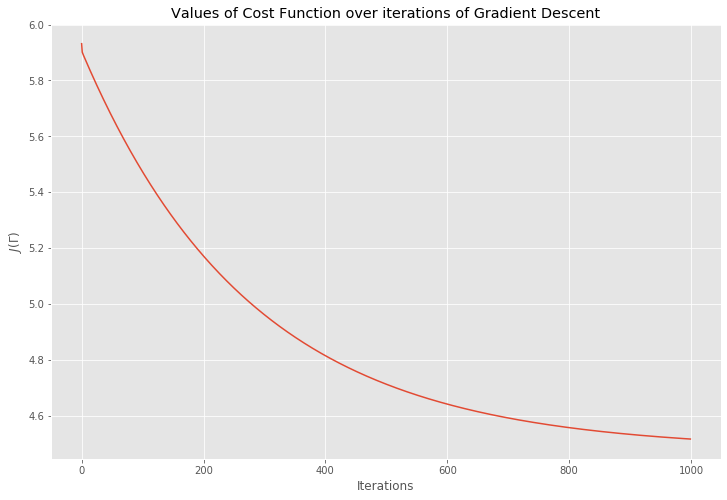

In [21]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Gamma)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

###  Training the Data 
---

In [23]:
gamma.shape

(2, 1)

In [24]:
gamma

array([[-3.24258172],
       [ 1.1274127 ]])

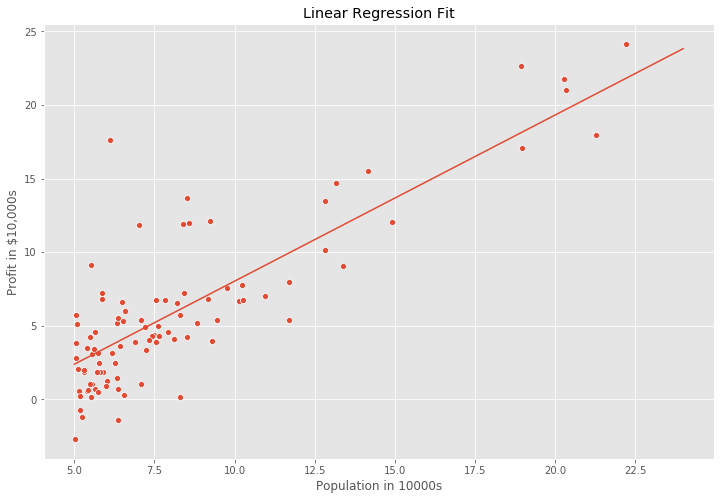

In [26]:
gamma = np.squeeze(gamma)
sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * gamma[1] + gamma[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

### Inference using the minimised values
---

In [30]:
def predict(x, gamma):
    y_pred = np.dot(gamma.transpose(), x)
    return y_pred

In [31]:
y_pred_1 = predict(np.array([1, 4]),gamma) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $12671.0


In [32]:
y_pred_2 = predict(np.array([1, 8.3]), gamma) * 10000
print("For a population of 83,000, the model predicts a profit of $"+str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $61149.0
